<a href="https://colab.research.google.com/github/sehgal-neil/APMTH120/blob/main/LinAlg_HW_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from numpy import linalg
import scipy as scipy
from scipy import io
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

In [ ]:
def my_cost(y,a4):
    cost=.5*(a4-y).T@(a4-y)
    return cost

def my_tansig(x):
    t=2./(1+np.exp(-2.*x))-1;
    return t

def my_tansig_prime(x):
    return 1 - my_tansig(x)**2

def my_softmax(x):
    return np.exp(x)/np.sum(np.exp(x))

def my_softmax_prime(x):
    return np.diag(my_softmax(x)) - my_softmax(x)*my_softmax(x.T)

In [ ]:
def my_feedforward(X,w2,b2,w3,b3,w4,b4, verbose=False):
    ## input layer:
    a1=X;
    ## first hidden layer:
    z2 = w2@a1 + b2;
    if verbose: print('z2: \n', z2.round(3))
    a2 = my_tansig(z2);
    if verbose: print('a2: \n', a2.round(3))
    ## second hidden layer:
    z3 = w3@a2 + b3;
    if verbose: print('z3: \n', z3.round(3))
    a3 = my_tansig(z3);
    if verbose: print('a3: \n', a3.round(3))
    ## output layer:
    z4 = w4@a3 + b4;
    if verbose: print('z4: \n', z4.round(3))
    a4 = my_softmax(z4);
    if verbose: print('a4: \n', a4.round(4))
    return a4

In [ ]:
def my_backpropagation(X,y,w2,b2,w3,b3,w4,b4):
    ########################################################################
    ## calculating the gradients using back propagation.

    ## ------------
    ## feedforward:
    ## ------------
    ## input layer:
    a1=X;
    ## first hidden layer:
    z2 = w2@a1 + b2;
    a2 = my_tansig(z2); # 2x1
    ## second hidden layer:
    z3 = w3@a2 + b3;
    a3 = my_tansig(z3); # 3x1
    ## output layer:
    z4 = w4@a3 + b4;
    a4 = my_softmax(z4); # 3x1
    
    ## -------------------------
    ## cost and cost derivative:
    ## -------------------------
    cost=0.5*sum((a4-y)**2);
    dcost=(y-a4);
    print("cost=");print(cost.round(10));
    print("dcost=");print(dcost.round(10));

    ## ----------------
    ## backpropagation:
    ## ----------------
    delta4 = my_softmax_prime(z4)@dcost;
    nabla_b4 = delta4;
    nabla_w4 = delta4@a3.T; # should be 3x3

    delta3 = (w4.T@delta4)*my_tansig_prime(z3);
    nabla_b3 = delta3;
    nabla_w3 = delta3@a2.T;

    delta2 = (w3.T@delta3)*my_tansig_prime(z2);
    nabla_b2 = delta2;
    nabla_w2 = delta2@a1.T;
    return nabla_w2,nabla_b2,delta2,nabla_w3,nabla_b3,delta3,nabla_w4,nabla_b4,delta4,cost,dcost

In [ ]:
w2=np.array([[-0.67257, -0.85117 ], [-1.3688 , 0.88758 ]])
b2=np.array([[ 6.1045 ],[ 2.8326 ]])
w3=np.array([[-0.85384, -3.8366 ],[ 4.0184 , 1.351 ],[ 3.5379 , -3.0828 ]])
b3=np.array([[-1.0575 ],[-0.88277 ],[ 3.1222 ]])
w4 = np.array([[ 8.3933, -6.6075, 6.0136 ],[-4.4107 , 10.865 , 3.6518 ],[-5.4941 , -5.342 , -10.575 ]])
b4 = np.array([[-1.1663 ],[ 0.99082 ],[-0.010211 ]])

# Question 1a

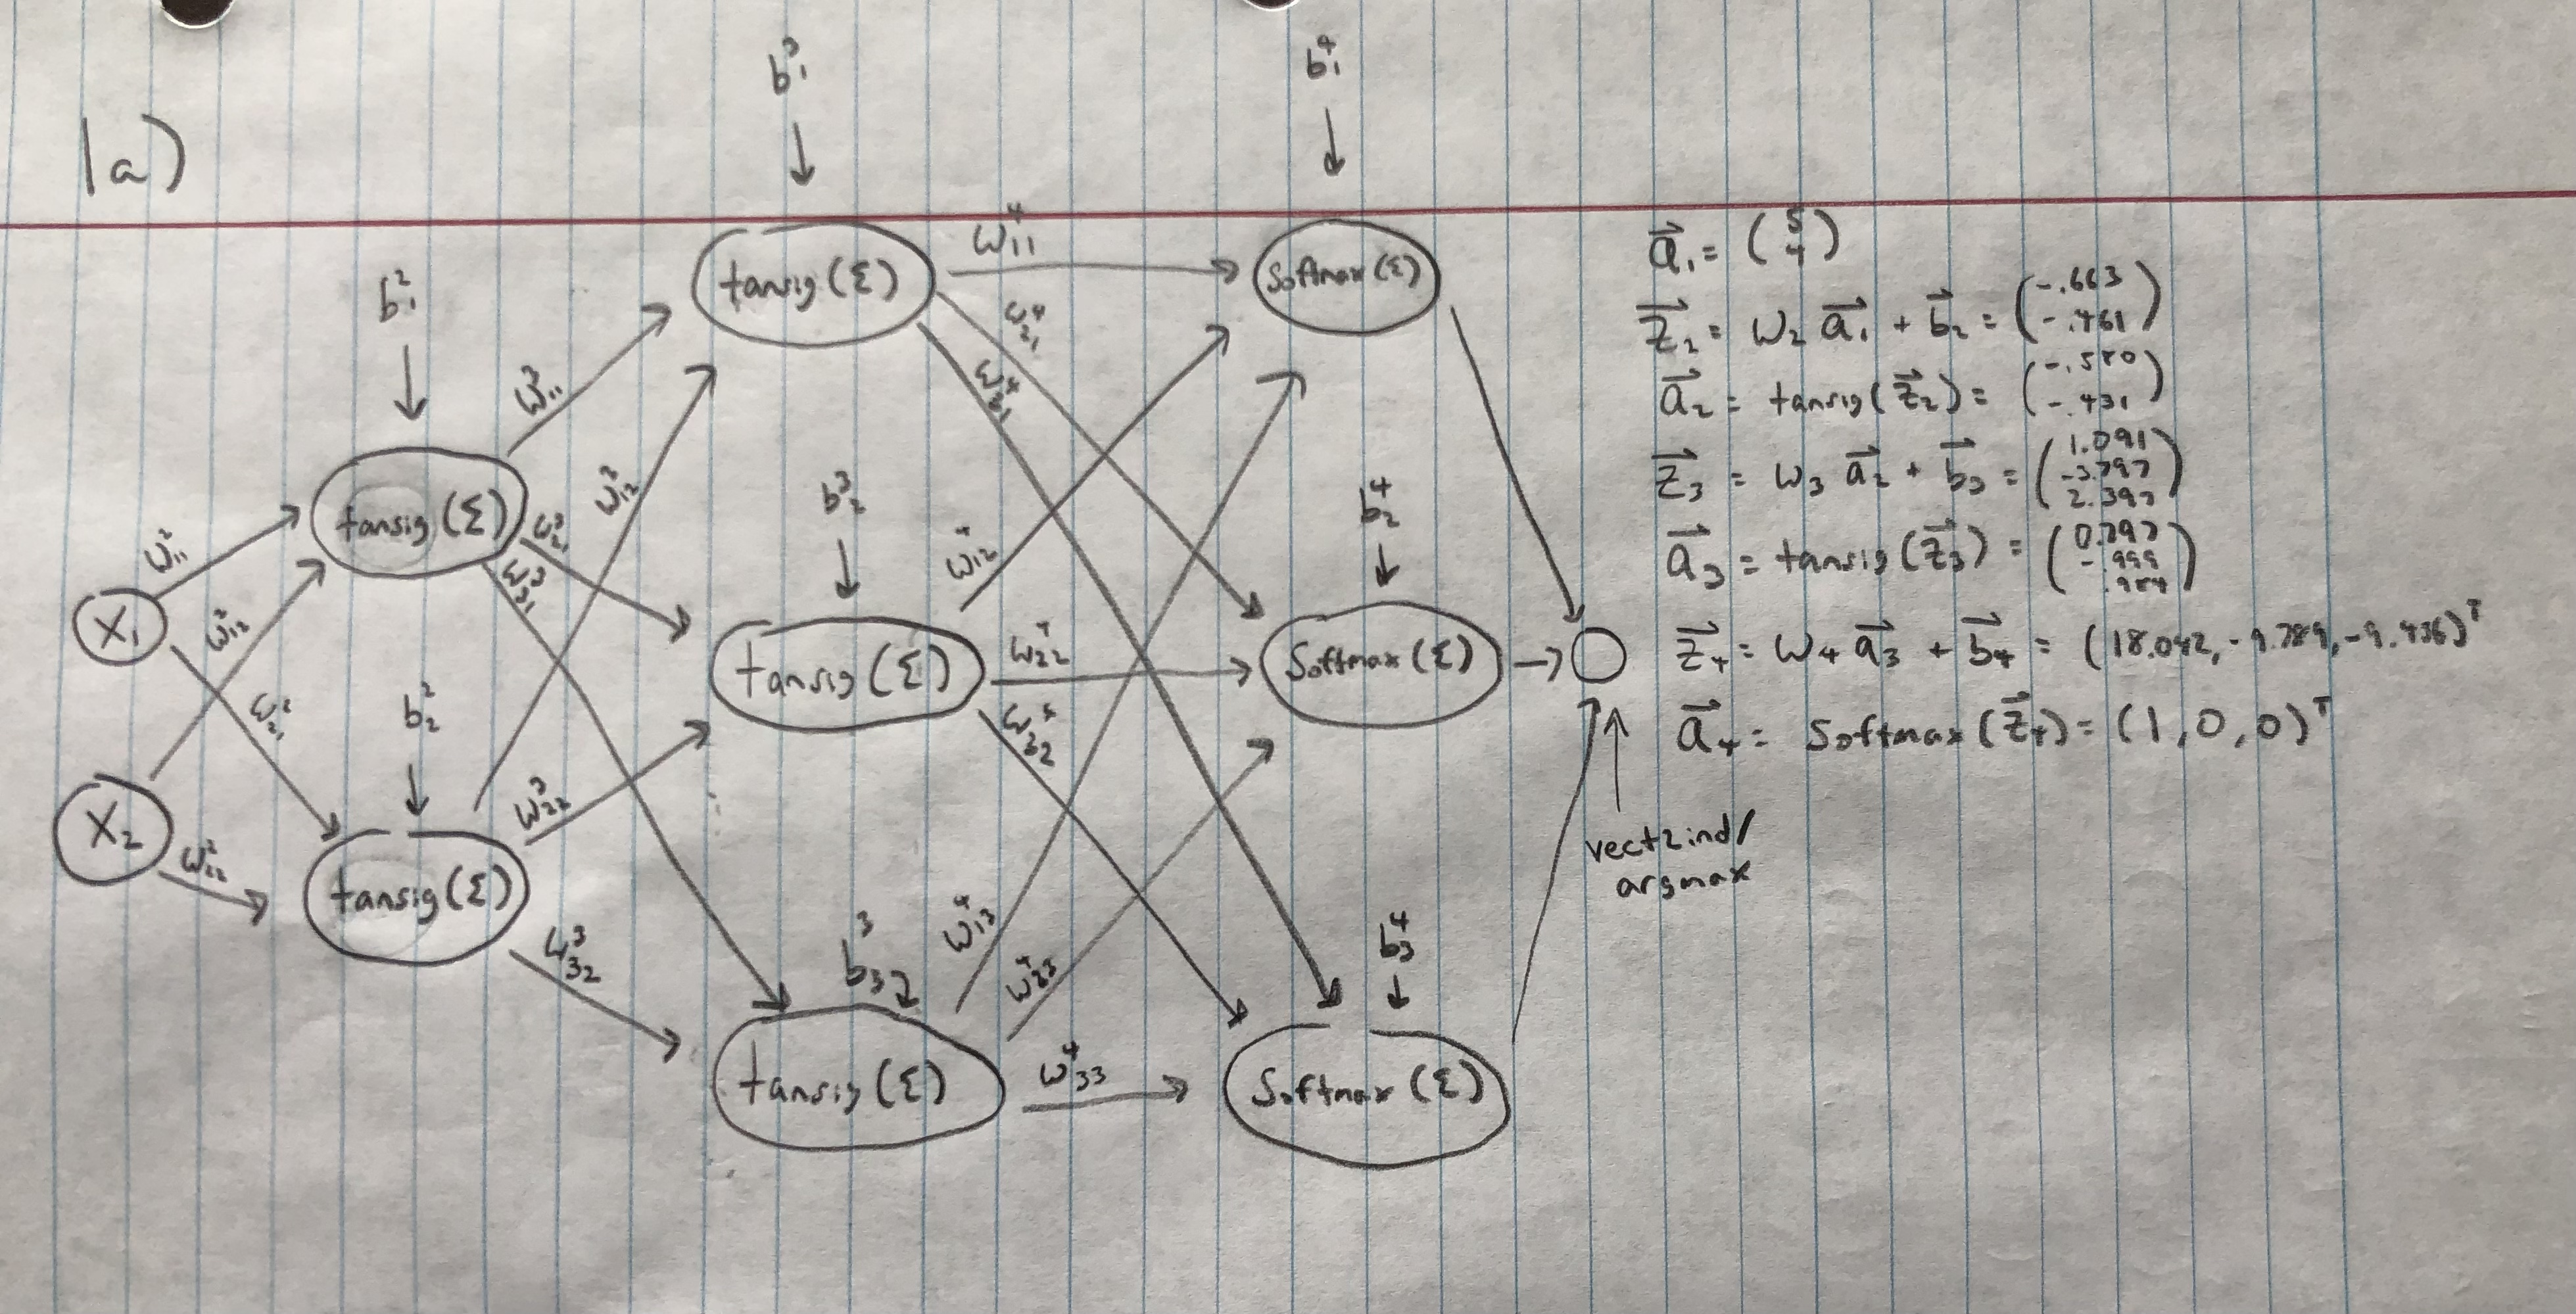

In [ ]:
X=np.array([[5, 4]]); X=X.T;
true_label = my_feedforward(X,w2,b2,w3,b3,w4,b4, verbose=True)

print('a4 after vect2ind: ', np.argmax(true_label))


z2: 
 [[-0.663]
 [-0.461]]
a2: 
 [[-0.58 ]
 [-0.431]]
z3: 
 [[ 1.091]
 [-3.797]
 [ 2.397]]
a3: 
 [[ 0.797]
 [-0.999]
 [ 0.984]]
z4: 
 [[18.042]
 [-9.789]
 [-9.456]]
a4: 
 [[1.]
 [0.]
 [0.]]
a4 after vect2ind:  0


# Question 1b

In [ ]:
dell=0.3; 
w2=w2+dell; 
b2=b2+dell; 
w3=w3+dell;
b3=b3+dell;

a4 = my_feedforward(X,w2,b2,w3,b3,w4,b4, verbose=True)

print('a4 after vect2ind: ', np.argmax(a4))


print('\n\n-- Cost:')
cost1b=my_cost(true_label,a4);
print("cost1b=");print(cost1b);

z2: 
 [[2.337]
 [2.539]]
a2: 
 [[0.982]
 [0.988]]
z3: 
 [[-4.794]
 [ 5.286]
 [ 4.441]]
a3: 
 [[-1.]
 [ 1.]
 [ 1.]]
z4: 
 [[-10.154]
 [ 19.916]
 [-10.431]]
a4: 
 [[0.]
 [1.]
 [0.]]
a4 after vect2ind:  1


-- Cost:
cost1b=
[[1.]]


# Question 1c

In [ ]:
print('\n\n-- Backpropagation:')
nabla_w2,nabla_b2,delta2,nabla_w3,nabla_b3,delta3,nabla_w4,nabla_b4,delta4,cost,dcost \
    =my_backpropagation(X,true_label,w2,b2,w3,b3,w4,b4);

print('\n-- Backpropagation results:');
print("cost=");print(cost.round(3));
print("dcost=");print(dcost.round(3));
print("delta4=");print(delta4.round(3));
print("nabla_w4=");print(nabla_w4.round(3));
print("nabla_b4=");print(nabla_b4.round(3));
print("delta3=");print(delta3.round(3));
print("nabla_w3=");print(nabla_w3.round(3));
print("nabla_b3=");print(nabla_b3.round(3));
print("delta2=");print(delta2.round(3));
print("nabla_w2=");print(nabla_w2.round(3));
print("nabla_b2=");print(nabla_b2.round(3));



-- Backpropagation:
cost=
[1.]
dcost=
[[ 1.]
 [-1.]
 [ 0.]]

-- Backpropagation results:
cost=
[1.]
dcost=
[[ 1.]
 [-1.]
 [ 0.]]
delta4=
[[0.]
 [1.]
 [0.]]
nabla_w4=
[[-0.  0.  0.]
 [-1.  1.  1.]
 [-0.  0.  0.]]
nabla_b4=
[[0.]
 [1.]
 [0.]]
delta3=
[[-0.001]
 [ 0.001]
 [ 0.002]]
nabla_w3=
[[-0.001 -0.001]
 [ 0.001  0.001]
 [ 0.002  0.002]]
nabla_b3=
[[-0.001]
 [ 0.001]
 [ 0.002]]
delta2=
[[0.]
 [0.]]
nabla_w2=
[[0.002 0.002]
 [0.    0.   ]]
nabla_b2=
[[0.]
 [0.]]


In [ ]:
## steepesent descent:
print('\n-- Improving weights and biases using a single steepeset ' 
           'descent iteration:')


eta=10;
_w2=w2-eta*nabla_w2; 
_b2=b2-eta*nabla_b2;
_w3=w3-eta*nabla_w3; 
_b3=b3-eta*nabla_b3;
_w4=w4-eta*nabla_w4; 
_b4=b4-eta*nabla_b4;


## re-evaluate solution and cost for revised network:
y4=my_feedforward(X,_w2,_b2,_w3,_b3,_w4,_b4);
print("y4=");print(y4.round(3));
print('y4 after vect2ind: ', np.argmax(y4))
cost1c=my_cost(true_label,y4);
print('\nCost before steepest descent='+repr(cost1b)+', after='+repr(cost1c));
print('The cost after steepest descent is lower, and our point is now correctly classified again. This makes sense. Each adjustment\n \
of our weights and biases should move the function closer to the correct output.')



-- Improving weights and biases using a single steepeset descent iteration:
y4=
[[0.569]
 [0.   ]
 [0.431]]
y4 after vect2ind:  0

Cost before steepest descent=array([[1.]]), after=array([[0.18609808]])
The cost after steepest descent is lower, and our point is now correctly classified again. This makes sense. Each adjustment
 of our weights and biases should move the function closer to the correct output.


# Question 1d

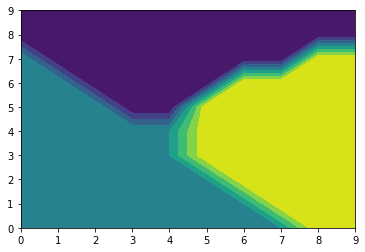

In [ ]:
# unperturbed weights
w2=np.array([[-0.67257, -0.85117 ], [-1.3688 , 0.88758 ]])
b2=np.array([[ 6.1045 ],[ 2.8326 ]])
w3=np.array([[-0.85384, -3.8366 ],[ 4.0184 , 1.351 ],[ 3.5379 , -3.0828 ]])
b3=np.array([[-1.0575 ],[-0.88277 ],[ 3.1222 ]])
w4 = np.array([[ 8.3933, -6.6075, 6.0136 ],[-4.4107 , 10.865 , 3.6518 ],[-5.4941 , -5.342 , -10.575 ]])
b4 = np.array([[-1.1663 ],[ 0.99082 ],[-0.010211 ]])

X1 = np.arange(0,10,1)
X2 = np.arange(0,10,1)

comb_array = np.array(np.meshgrid(X1, X2)).T.reshape(-1, 2)
Z = []
for _x in comb_array:
  _x = _x.reshape(2,1)
  Z.append(my_feedforward(_x,w2,b2,w3,b3,w4,b4))
Z = np.array(Z)
Z = Z.reshape(-1, 3)

_Z = Z.argmax(1).reshape(len(X1), len(X2))
plt.contourf(X1,X2,_Z)

# Question 2

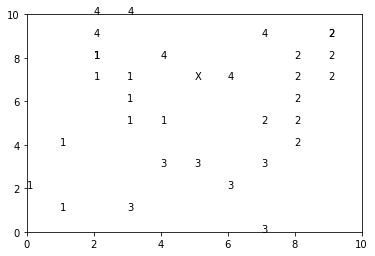

In [ ]:
X = np.array(np.matrixlib.defmatrix.matrix('[3,3,3,8,5,2,4,6,3,8,2,0,4,1,8,9,9,8,7,2,2,9,8,7,1,2,7,7,4,3,2,6,9; 7,5,1,5,3,9,5,7,10,7,8,2,3,1,6,7,8,8,3,8,8,9,4,9,4,7,5,0,8,6,10,2,9]'));
y = np.array([1,1,3,2,3,4,1,4,4,2,1,1,3,1,2,2,2,2,3,1,1,2,2,4,1,1,2,3,4,1,4,3,2]);

N=len(y);
for i in range(N):
  plt.text(X[0,i],X[1,i],str(y[i]));
plt.xlim(0, 10); plt.ylim(0, 10);
plt.text(5,7, 'X')
plt.show()

In [ ]:
## point that needs to be classified:
x1=5;x2=7;

In [ ]:
# distances from training data to point:
d=np.zeros((N));
for i in range(0,N):
    d[i]=np.linalg.norm(np.array([x1,x2])-X[:,i]);
print(d)

[2.         2.82842712 6.32455532 3.60555128 4.         3.60555128
 2.23606798 1.         3.60555128 3.         3.16227766 7.07106781
 4.12310563 7.21110255 3.16227766 4.         4.12310563 3.16227766
 4.47213595 3.16227766 3.16227766 4.47213595 4.24264069 2.82842712
 5.         3.         2.82842712 7.28010989 1.41421356 2.23606798
 4.24264069 5.09901951 4.47213595]


In [ ]:
# find k Nearest Neighbors: 
I=d.argsort(axis=0)

k_list = [2,3,5]
for k in k_list:
  # take first k points
  k_neighbors = I[0:k]
  # make list of labels of k_neighbors
  k_neighbors_labels = []
  # for each neighbor, add their label to list
  for neighbor_index in k_neighbors:
    k_neighbors_labels.append(y[neighbor_index])
  print(f"For k: {k}, closest neighbors are at indices {k_neighbors}, their labels are {k_neighbors_labels}, therefore the classification is {stats.mode(k_neighbors_labels)[0]}")


For k: 2, closest neighbors are at indices [ 7 28], their labels are [4, 4], therefore the classification is [4]
For k: 3, closest neighbors are at indices [ 7 28  0], their labels are [4, 4, 1], therefore the classification is [4]
For k: 5, closest neighbors are at indices [ 7 28  0 29  6], their labels are [4, 4, 1, 1, 1], therefore the classification is [1]


# Question 3

In [ ]:
## parameters:
k=5; # nearest points to use for k-NN regression
sigma=1.2;# for calculating weights as gaussian of distances

# data:
X= np.array(([-0.87,-0.52,-0.73,-0.3,0.75,0.87,0.03,0.4,-0.54,-0.18,-0.69,0.57,0.62,-0.02,0.01,0.02,0.12,0.91,0.37,-0.46],[-0.26,0.48,0.23,0.47,-0.73,0.08,-0,0.19,0.84,-0.61,0.77,0.1,-0.68,0.58,-0.66,-0.24,-0.25,-0.57,-0.99,0.24]))
## column vector with values (labels) of training data:
V= np.array((1.02,-0.21,0.3,-0.38,1.29,0.68,0,-0.03,-0.55,0.64,-0.29,0.22,1.06,-0.58,0.66,0.24,0.26,1.4,1.13,-0.03))

## point that needs to be classified:
x1=0.6;x2=0.4;
N = len(X[0])
# distances from training data to point:
d=np.zeros((N));
for i in range(0,N):
    d[i]=np.linalg.norm(np.array([x1,x2])-X[:,i]);

# find k Nearest Neighbors: 
I=d.argsort(axis=0)
d.sort()
radius=d[k-1]*1.1;
X_NN=X[:,I[0:k]];
V_NN=V[I[0:k]];
d_NN=d[I[0:k]];
K=np.diag(np.exp(-(d_NN/sigma)**2));

# calculate w:
w=np.linalg.inv(X_NN@K@X_NN.T)@(X_NN@K)@V_NN;

# estimate at needed point:
prediction=w.T@np.array([x1,x2]);
print(f'predicted value for ({x1},{x2}) is {prediction}')

predicted value for (0.6,0.4) is 0.02535784891153614


# Question 4

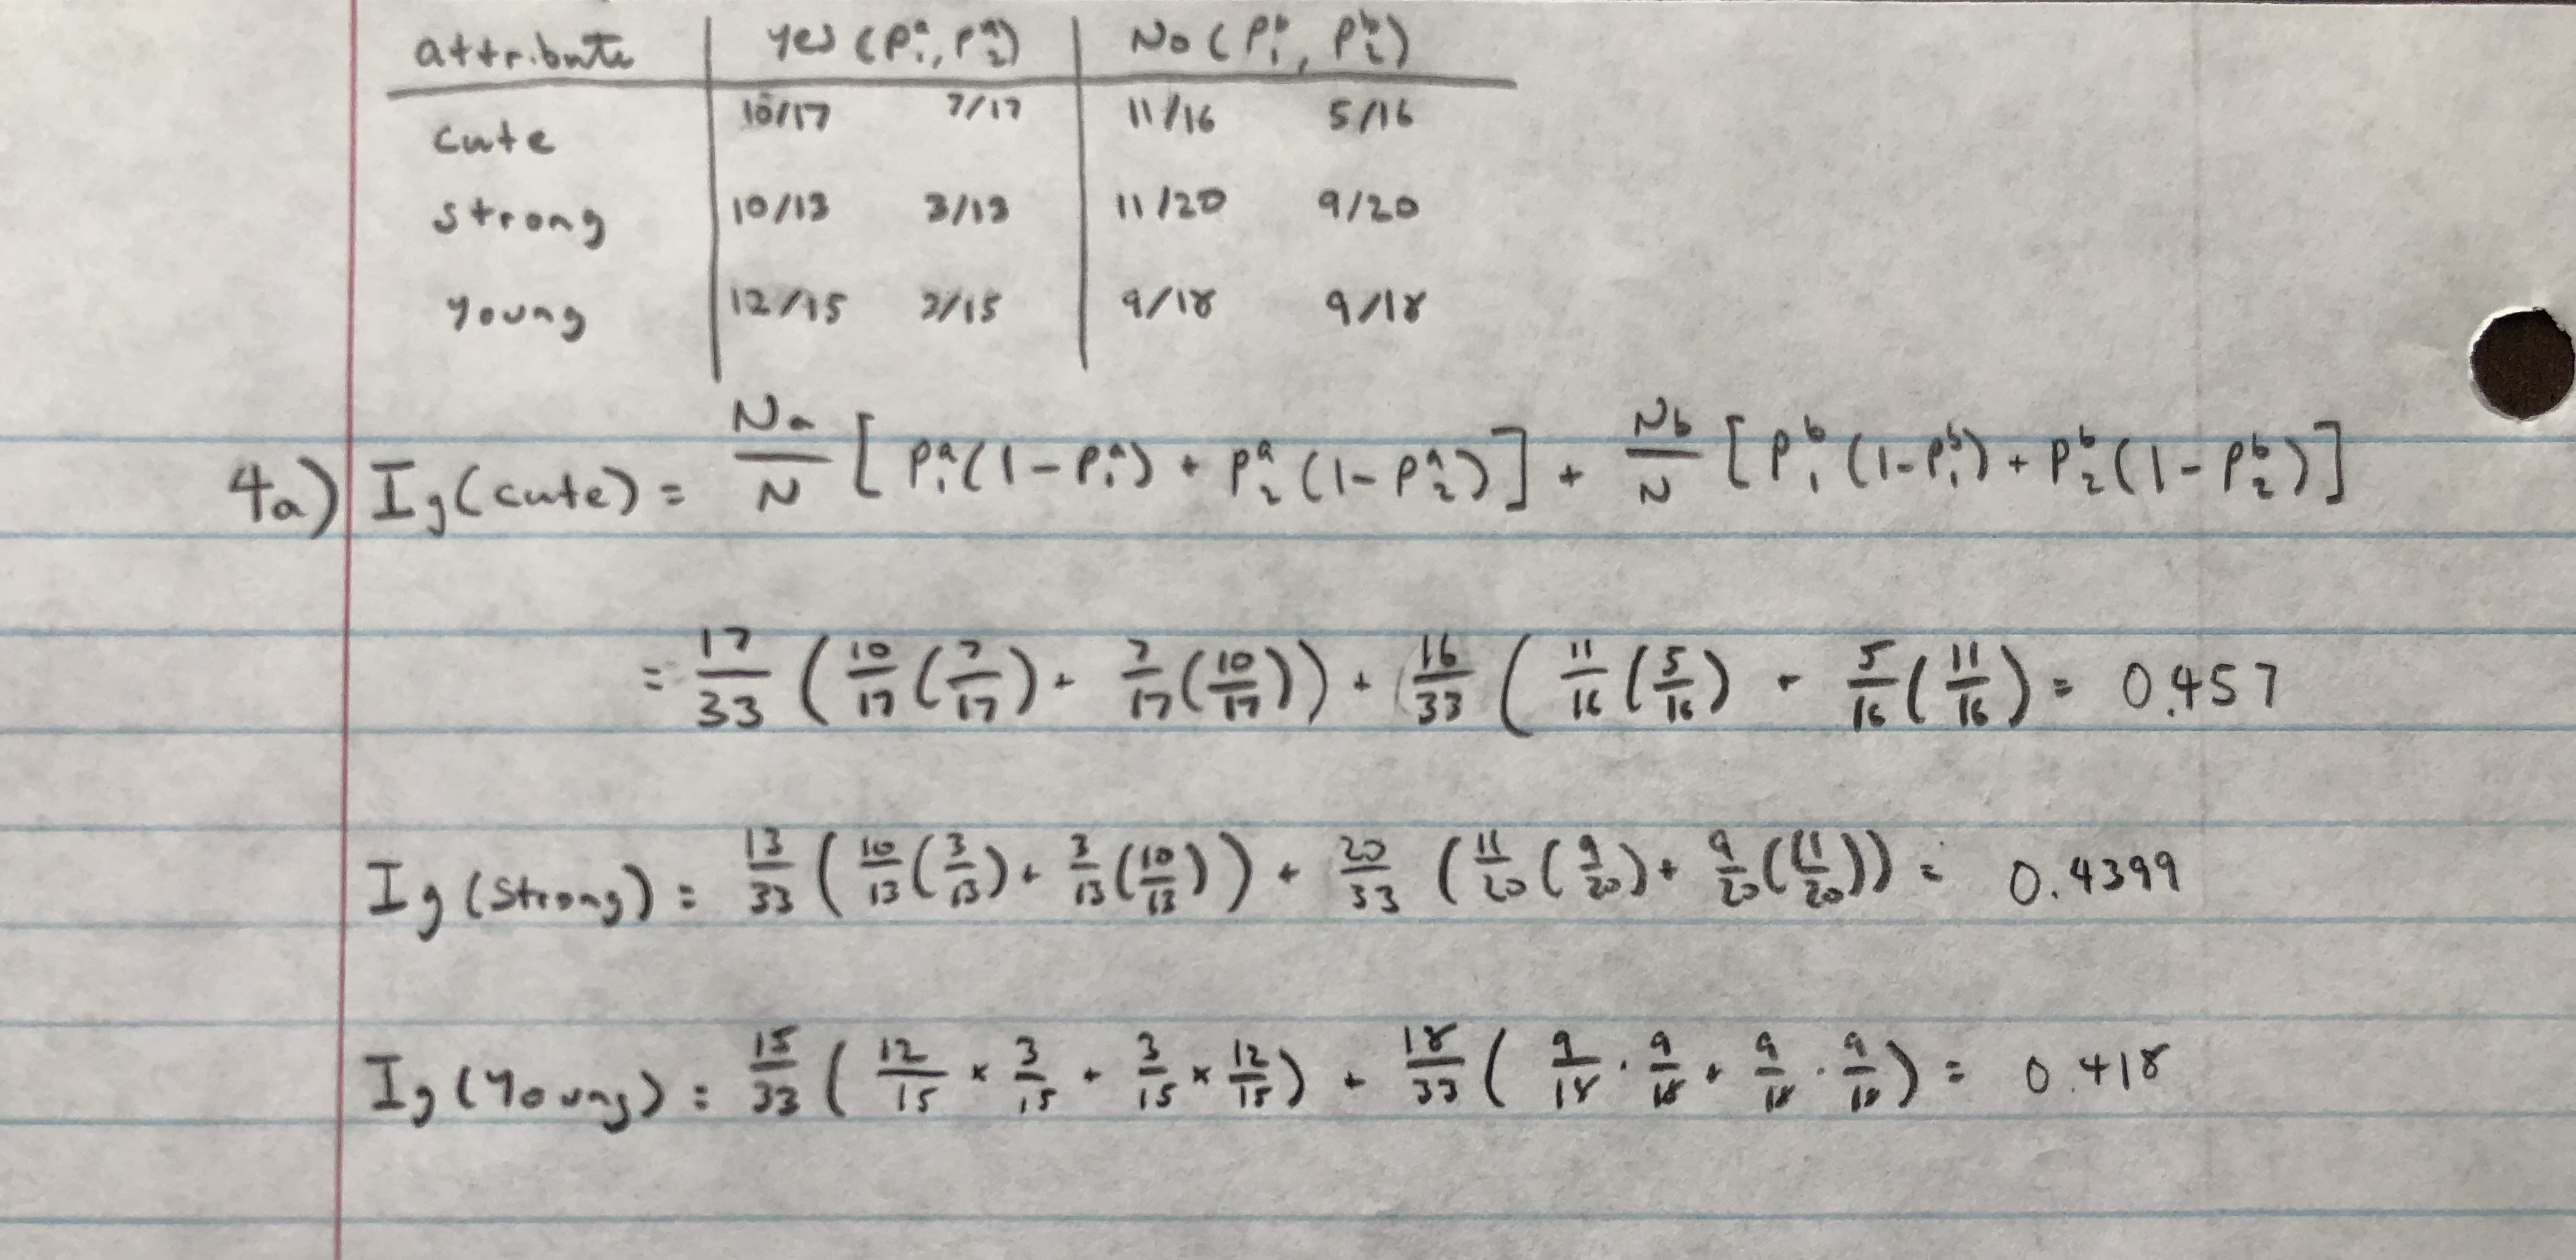

In [ ]:
import numpy as np
from numpy import linalg
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree

## Data:
#    cute , strong , young ,  yes/no

DATA = np.array( \
      [[1          , 1      , 1   , 1],
      [1          , 1      , 1   , 1],
      [1          , 1      , 1   , 0],
       [1          , 0      , 1   , 1],
       [1          , 0      , 1   , 1],
       [1          , 0      , 1   , 1],
       [1          , 0      , 1   , 1],
       [1          , 0      , 1   , 1],
        [1          , 1      , 0   , 1],
        [1          , 1      , 0   , 0],
        [1          , 1      , 0   , 0],
       [1          , 0      , 0   , 1],
       [1          , 0      , 0   , 1],
       [1          , 0      , 0   , 0],
       [1          , 0      , 0   , 0],
       [1          , 0      , 0   , 0],
       [1          , 0      , 0   , 0],
        [0          , 1      , 1   , 1],
        [0          , 1      , 1   , 1],
      [0          , 0      , 1   , 1],
      [0          , 0      , 1   , 1],
      [0          , 0      , 1   , 1],
      [0          , 0      , 1   , 0],
      [0          , 0      , 1   , 0],
       [0          , 1      , 0   , 1],
       [0          , 1      , 0   , 1],
       [0          , 1      , 0   , 1],
       [0          , 1      , 0   , 1],
       [0          , 1      , 0   , 1],
      [0          , 0      , 0   , 1],
      [0          , 0      , 0   , 0],
      [0          , 0      , 0   , 0],
      [0          , 0      , 0   , 0]])




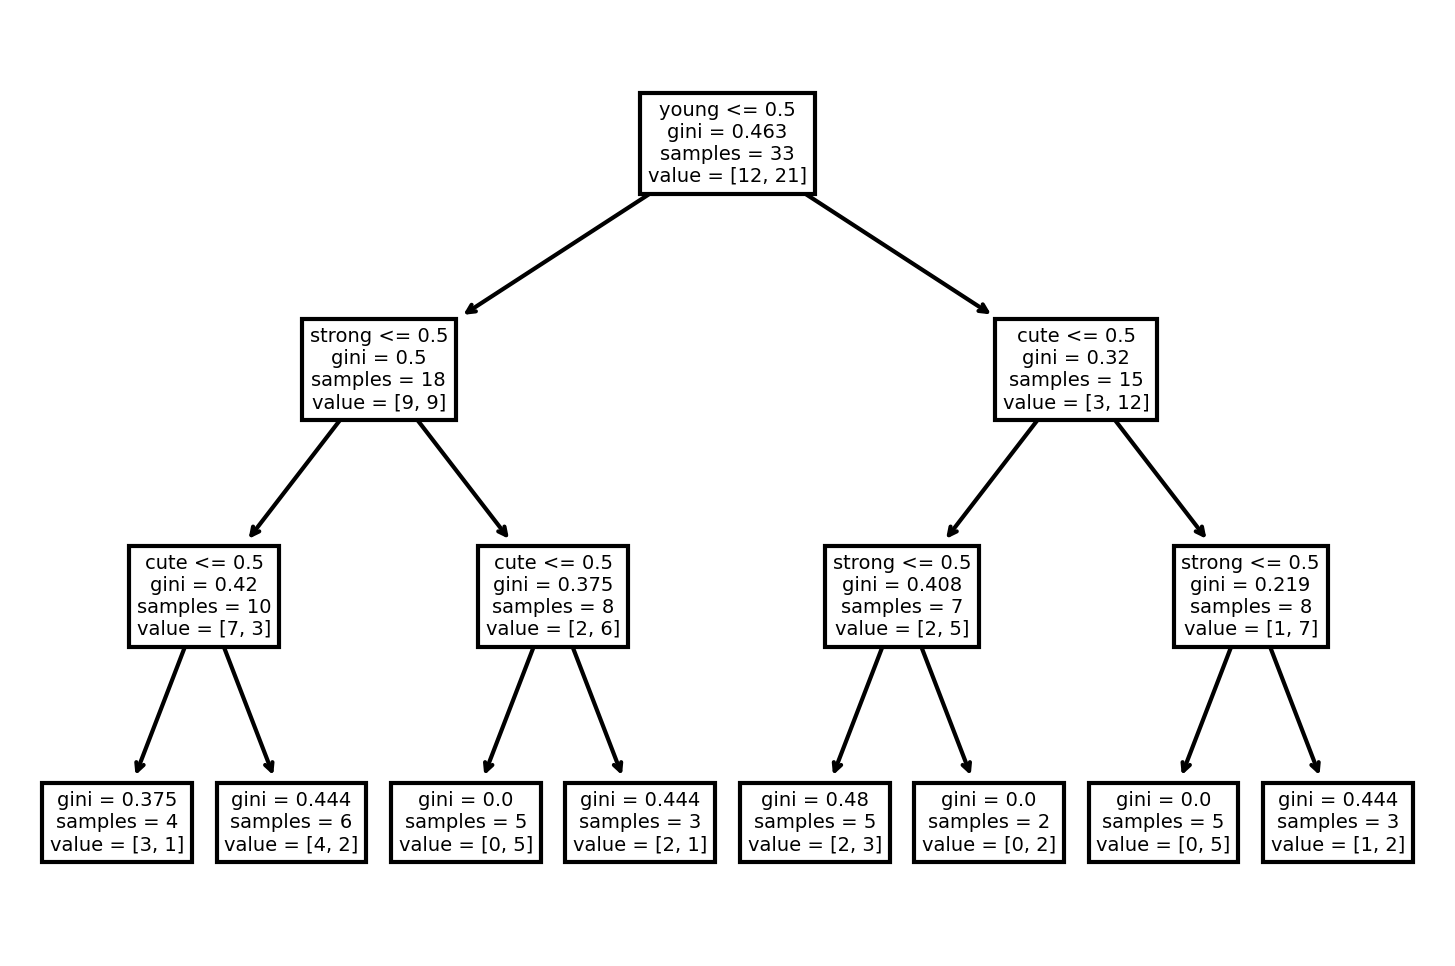

NOTE: Python seems to calculate GINI slightly different than the equation we used in class. 
 Still, we see that both by my hand calculation and pythons top root is chosen to be young


In [ ]:
X=DATA[:,0:3];
Y=DATA[:,3];
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
#tree1 = fitctree(X,Y,'CategoricalPredictors',[1, 2, 3] ...
#                 ,'PredictorNames',{'cute','strong','young'} ...
#                 ,'ResponseName','buy' ...
#                 ,'MinLeafSize',1,'MergeLeaves','off' ...
#                 ,'MinParentSize',1);

#view(tree1,'Mode','graph','PruneLevel',max(tree1.PruneList));
plt.figure(dpi=300)
tree.plot_tree(clf,feature_names=['cute','strong','young'])
plt.show()

print('NOTE: Python seems to calculate GINI slightly different than the equation we used in class. \n Still, we see that both by my hand calculation and pythons top root \
is chosen to be young')

# Question 5

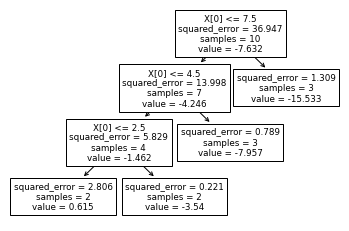

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = np.array((1,    2,    3,    4,    5,    6,    7,    8,    9,   10)).reshape(-1,1)
y = np.array((2.29, -1.06, -3.07, -4.01, -7.18, -9.2, -7.49, -14.1, -15.6, -16.9))

N=len(X);

## fit tree:
regressor = DecisionTreeRegressor(random_state=0,min_samples_leaf=2)
regressor.fit(X, y)

## view the tree:
tree.plot_tree(regressor);
plt.show()

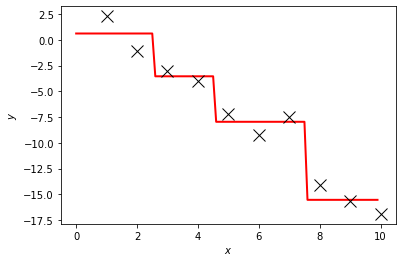

In [ ]:
## use the trained tree to classify and plot a range of points:
Xtest=np.arange(0,10,0.1);
Xtest.shape=(-1,1)
y1=regressor.predict(Xtest);

plt.figure(1);
plt.plot(Xtest,y1,'r',linewidth=2)
plt.plot(X,y,'kx',markersize=12,linewidth=2);
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.show()

# Question 6a

To construct a random forest, we create many trees. For each tree, we randomly sample our data N times (where N is the length of the data) with replacement. This means some data points could be sampled more than once and some won't be sampled at all. We repeat this many times to build a bunch of trees. Then we average across our whole forest to determine the output for a given X.

# Question 6b

In [ ]:
X = np.array((1,    2,    3,    4,    5,    6,    7,    8,    9,   10)).reshape(-1,1)
y = np.array((2.29, -1.06, -3.07, -4.01, -7.18, -9.2, -7.49, -14.1, -15.6, -16.9))

X1 = np.delete(X, [0,6,8]).reshape(-1,1)
y1 = np.delete(y, [0,6,8])

X2 = np.delete(X, [2,5,9]).reshape(-1,1)
y2 = np.delete(y, [2,5,9])

X3 = np.delete(y, [1,4,7]).reshape(-1,1)
y3 = np.delete(y, [1,4,7])


## fit tree for each dataset:
regressor1 = DecisionTreeRegressor(random_state=1,min_samples_leaf=2)
regressor1.fit(X1, y1)

regressor2 = DecisionTreeRegressor(random_state=1,min_samples_leaf=2)
regressor2.fit(X2, y2)

## fit tree for each dataset:
regressor3 = DecisionTreeRegressor(random_state=1,min_samples_leaf=2)
regressor3.fit(X3, y3)

DecisionTreeRegressor(min_samples_leaf=2, random_state=1)

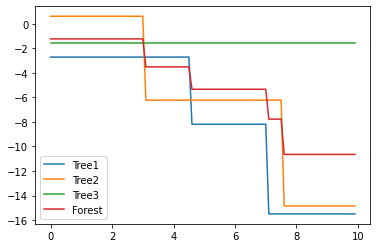

In [ ]:
_X = np.arange(0,10,.1).reshape(-1,1)

yhat1 = regressor1.predict(_X)
yhat2 = regressor2.predict(_X)
yhat3 = regressor3.predict(_X)
ensemble = np.array([ yhat1, yhat2, yhat3 ]).mean(0)
all_data = regressor.predict(_X)
plt.plot(_X, yhat1, label='Tree1')
plt.plot(_X, yhat2, label='Tree2')
plt.plot(_X, yhat3, label='Tree3')
plt.plot(_X, ensemble, label='Forest')
plt.legend()
plt.show()




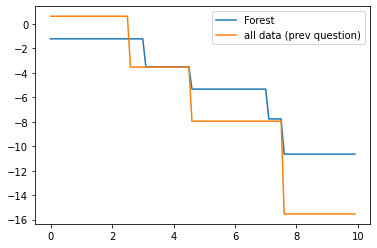

In [ ]:
plt.plot(_X, ensemble, label='Forest')
plt.plot(_X, all_data, label='all data (prev question)')
plt.legend()
plt.show()


We see that the Forest pretty closely mimics the original tree but it also seems to predict less extreme Y values at higher values of X.